# Table of Contents

1. [Introduction](#intro)
1. [Data preprocessing](#dat_pre)
    1. [Importing the data](#import)
    1. [Printing some glitches](#check)
    1. [Checking the metadata](#meta)
        1. [Bar chart of glitch class counts](#barplot)
        1. [Pairplot](#pairplot)
        1. [Correlation](#corr)
    1. [Image preprocessing](#img_pre)
1. [Image Classification](#img_class)
    1. [Multinomial logistical regression](logit)
    1. [Deep neural networks]()
    1. [Convolution neural networks]()
    1. [Results]()

# Final Project: Determining glitch morphology classification
## DATS 6202 - Machine Learning I 
### Izzy Illari (gwid) and Lucia Illari (gwid)

# Introduction
<a id = "intro"></a>

<div align="left"> <font size="3"><i>Fig. 1:</i> The gravitational-wave event GW150914 observed by the LIGO Hanford (H1, left column panels) and Livingston (L1, right
column panels) detectors, with times shown relative to September 14, 2015 at 09:50:45 UTC. These are the time-frequency representation of the
strain data, demonstrating the "chirp" or frequency shift across time. (<a href="https://physics.aps.org/featured-article-pdf/10.1103/PhysRevLett.116.061102">image source</a>) </font></div>

<img style="display: block; margin-left: 50px; margin-right: 50px" src="gw150914_chirp.png" align="center" width="1000">

First proposed by Henri Poincar´e in 1905, Albert Einstein predicted the existence of gravitational waves (GWs), though he understood that the amplitudes of GWs would be incredibly small and even himself doubted their existence. Indeed, until the Chapel Hill conference four decades later there was considerable debate over their existence, as gravitational waves cannot exist in Newton’s law of universal gravitation. 

In the same year as the final formation of the field equations of general relativity, Schwarzschild would publish the solution for these field equations, and Kerr would go on to generalize this solution to rotating black holes. Further advances and breakthroughs have enabled the accurate modeling of black hole mergers and predictions of gravitational waveforms, which had not been previously directly observed until 14 September 2015, the first observance of a binary black hole merger. Until the collaborative efforts of LIGO and Virgo, gravitational waves had only been inferred indirectly. 

There are four main sources of GWs: continuous, inspiral, burst, and stochastic, with possible sources of detectable gravitational waves including binary star systems, composed of black holes, white dwarfs, and neutron stars ([2](#intro_gw)).

Since the change in distance that is being measured is in fact so small, a modified Michelson Interferometer was necessary. The US-based detectors are H1 and H2,
both located in Hanford, Washington and LI, located Livingston, Louisiana (L1) - comprise the Laser Interferometer Gravitational-wave Observatory (LIGO). H1 and
L1 both have 4-kilometer long arms, whereas H2 has 2-kilometer long arms. Advanced LIGO (aLIGO) replaced the three initial LIGO (iLIGO) interferometers with detectors using new instrument hardware ([3](#hardware)). The current intent is to offer the H2 interferometer components to India for the installation of a third LIGO observatory. The detectors have Fabry-Perot arm cavities, which increases the storage time of light, effectively increasing the arm length. Although the detectors are operating beyond their initial designs with greater sensitivity ([4](#sensitivity)), the detector’s are limited by glitches and noises in either the gravitational wave channel itself or the auxiliary channels, which monitor internal performance as well as the surrounding environment.

The Detector Characterization group (DetChar) is solely dedicated to the detection of and classification of unwanted disturbances within the GW channel and the auxiliary channels. There are innumerable numbers of both known and unknown sources of noise, the most prevalent of which are short-duration broadband events (also known as glitches), and longer intervals of nonstationary noise. There have been efforts since LIGO’s inaugural observational run to rapidly identify and mitigate noise originating in both the detectors and the environment. There are hundred of auxiliary channels, however, thus making the task of increasing search efficiency a difficult one.

Further, the range of time-frequency-amplitude morphologies that glitches come in is wide and ever evolving. These glitches can also mimic or obscur detections of true GWs, and thus a robust characterization pipeline is instrumental in improving the detectors and achieving the GW detection rates predicted by the design sensitivity of LIGO ([5](#gspy)). This project thus uses image data made publically available through the Zooniverse-hoested crowdsourcing project Gravity Spy and employes a variety of machine learning algorithms to categorize images, after being trained on human-classified examples of the morphological classes.

The original data was found <a href="https://www.kaggle.com/tentotheminus9/gravity-spy-gravitational-waves">here on Kaggle</a>, and contains three folders (with subfolders) of images for training, testing, and validation. There are 22 subfolders which organize the images into their glitch categories, which are 

* 1080 lines
* 1400 ripples
* air compressor
* blip
* chirp
* extremely loud
* helix
* koi fish
* light modulation
* low frequency burst
* low frequency lines
* no glitch
* none of the above
* paired doves
* power line
* repeating blips
* scattered light
* scratchy
* tomte
* violin mode
* wandering line
* whistle

Each glitch has 4 associated images, where the time range is decreased and decreased to get a zoomed in image of the glitch, so if there are 16 images in a glitch folder, there are "actually" 4 unqiue glitches. However, the images in this data set are only the plot space - axis labels, tick marks, legend, title, essentially anything extraneous - has been removed. There are 22349 images in the testing dataset, 4733 images in the training dataset, and 4800 images in the validation dataset.

**TO DO:**

- [X] add table of contents
- [ ] write information between code cells and topics
    - [X] title
    - [X] intro
        - [X] about the dataset
        - [X] problem 
        - [X] motivation
    - [ ] experiment
        - [ ] code
        - [ ] discussion of results
    - [ ] conclusions
    
**for basic eda:**
    
- [X] import data
    - [X] select certain columns
    - [X] check if there is any missing data
    - [X] split data into test/train/val datasets
    - [X] use dummies function to encode categorical features (just ifo I think?) -> made `ifo_int` and `label_int` columns
    - [ ] split features and target
- [X] counts of glitch classes & bar chart
- [X] corner plot
- [X] correlation
- [ ] set the data up at the end of this section so it is EXACTLY the features you want and nothing more
- [ ] scale the data

**DO THESE FOR IMAGE CLASSIFICATION:**

- [ ] Logistic reg/multinomial logit reg/softmax
- [ ] Random forests
- [ ] ANN
- [ ] CNN
- [ ] KNN
- [ ] Decision tree
- [ ] SVM

# Data preprocessing
<a id = "dat_pre"></a>

## Importing the data
<a id = "import"></a>

First thing first, of course, is importing the data. But before that, we need to import the appropriate packages.

In [3]:
#importing necessary packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
from keras_preprocessing.image import ImageDataGenerator
# kaggle api
import kaggle
# find OS
import platform
pform = platform.system().lower()

#for setting the seed
random_seed = 1234

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

Next thing, we want to get the current directory, then check what system the person running this code is using, so that the file paths are in teh correct format. We want to download the data straight from Kaggle, and check to see if the zip doesn't already live on the person's system.

In [4]:
#get current directory
directory = os.getcwd()

# check if OS is mac
if pform == 'darwin':
    print("OS is " + str(platform.system()))
    # check that data doesn't already exist
    if not os.path.isfile(directory + "/gravity-spy-gravitational-waves.zip"):
        print("File does not exist! Downloading...")
        # import data from Kaggle API
        # this downloads to current directory
        !kaggle datasets download -d tentotheminus9/gravity-spy-gravitational-waves
    elif os.path.isfile(directory + "/gravity-spy-gravitational-waves.zip"):
        print("File exists!")

# check if OS is windows
elif pform in ['windows','cygwin']:
    print("OS is " + str(platform.system()))
    # check that data doesn't already exist
    if not os.path.isfile(directory + "\\gravity-spy-gravitational-waves.zip"):
        print("File does not exist! Downloading...")
        # import data from Kaggle API
        # this downloads to current directory
        !kaggle datasets download -d tentotheminus9/gravity-spy-gravitational-waves
    elif os.path.isfile(directory + "\\gravity-spy-gravitational-waves.zip"):
        print("File exists!")

OS is Windows
File exists!


If the file doesn't exist, the zip is downloaded. If it does, no download is necessary. Next step is to check if the file has already been unzipped. If there is no test, train, and validation folders, the file is unzipped.

In [5]:
%%capture
if pform == 'darwin':
    # check if data directories exist
    if not ( os.path.exists(directory + "/test/") 
            and os.path.exists(directory + "/train/") 
            and os.path.exists(directory + "/validation/") 
            and os.path.isfile(directory + "/trainingset_v1d1_metadata.csv") ):
        #unzip data
        !unzip "gravity-spy-gravitational-waves.zip"

elif pform in ['windows','cygwin']:
    # check if data directories exist
    if not ( os.path.exists(directory + "\\test") 
            and os.path.exists(directory + "\\train") 
            and os.path.exists(directory + "\\validation") 
            and os.path.isfile(directory + "\\trainingset_v1d1_metadata.csv") ):
        #unzip data
        !unzip "gravity-spy-gravitational-waves.zip"

Once we have the folders, for convenience's sake, we set some variables that contain the folder paths.

In [6]:
#get image data directories
if pform == 'darwin':
    train_dir = directory + '/train/train/'
    test_dir = directory + '/test/test/'
    val_dir = directory + '/validation/validation/'

elif pform in ['windows','cygwin']:
    train_dir = directory + '\\train\\train\\'
    test_dir = directory + '\\test\\test\\'
    val_dir = directory + '\\validation\\validation\\'

Set the target for the ML algorithms:

In [7]:
#set target for classification
target = 'label'

We would like a list of what all the glitch categories are, so let's just pull the titles of all the sub-folders, to preserve the order of the folders:

In [9]:
#get all glitch classes
categories = os.listdir(test_dir)

## Printing some glitches
<a id = "check"></a>

We have all these glitch categories, but (maybe) no idea what they look like! So let's go ahead and take a quick peak at one sample from each glitch category, so we can see what exactly we're working with here.

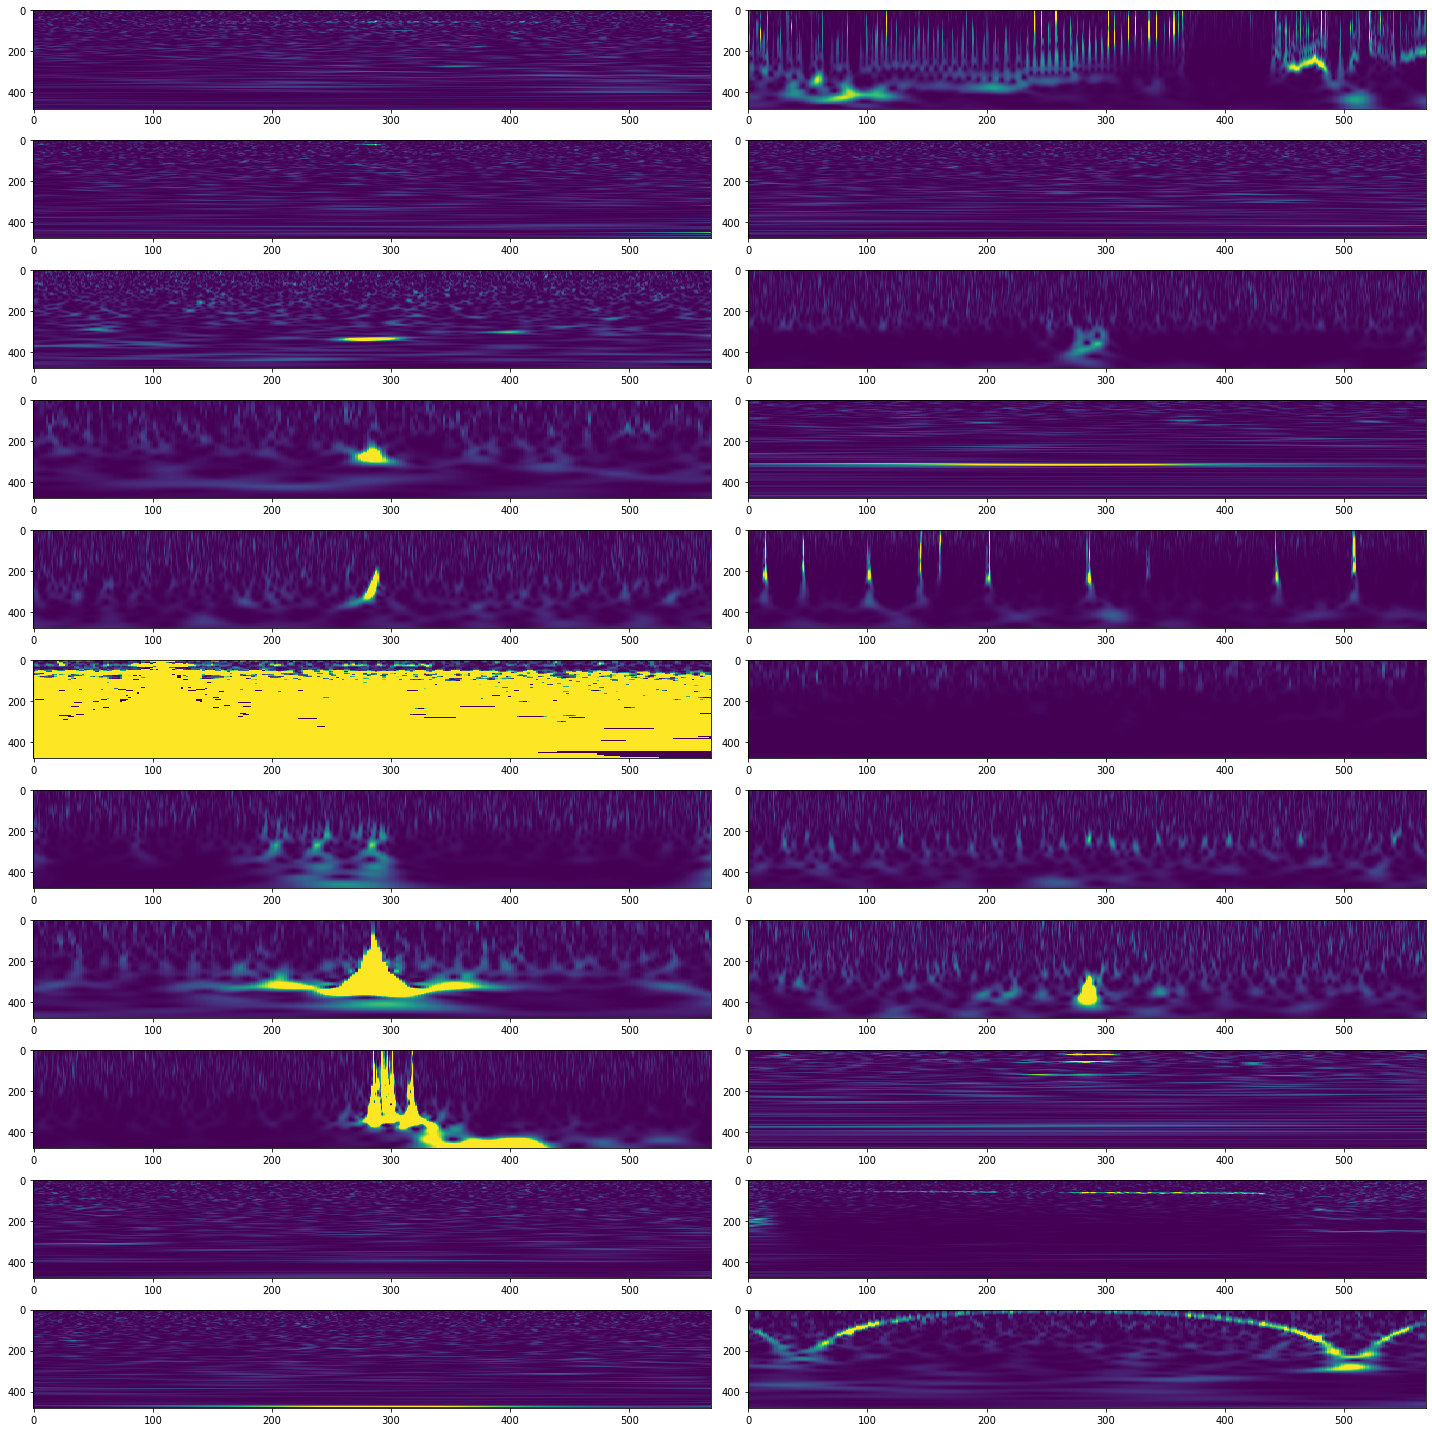

In [10]:
#let's look at one plot for each glitch class
counter = 0
fig, ax = plt.subplots(11, 2, figsize=(20, 20))

for k in range(2):
    for j in range(11):
        #get location folder of glitch class
        loc = train_dir + categories[counter]
        fold_loc = os.listdir(loc)
        #get image in folder
        if pform in ['windows','cygwin']:
            to_show = img.imread(loc + "\\" + fold_loc[round(len(fold_loc)/2)])
        elif pform == "darwin":
            to_show = img.imread(loc + "/" + fold_loc[round(len(fold_loc)/2)])
        ax[j,k].imshow(to_show, aspect='auto')
        counter = counter + 1
        if counter == len(categories):
            break
    else:
        #only executed if the inner loop didn't break
        continue 
    #only executed if the inner loop did break
    break
plt.tight_layout()
plt.show()

## Checking the metadata
<a id = "meta"></a>

This dataset also contains some metadata, such as the origin detector, attribute information (central frequency, bandwidth, snr, amplitude, etc), and links to the original images. We want to load this metadata in.

In [11]:
#get image metadata
if pform in ['windows','cygwin']:
    meta_original = pd.read_csv(directory+'\\trainingset_v1d1_metadata.csv')
elif pform == 'darwin':
    meta_original = pd.read_csv(directory+'/trainingset_v1d1_metadata.csv')

Let's look at the columns names of the metadata, to see what sort of information we're dealing with here.

In [12]:
#view columns
meta_original.columns

Index(['event_time', 'ifo', 'peak_time', 'peak_time_ns', 'start_time',
       'start_time_ns', 'duration', 'search', 'process_id', 'event_id',
       'peak_frequency', 'central_freq', 'bandwidth', 'channel', 'amplitude',
       'snr', 'confidence', 'chisq', 'chisq_dof', 'param_one_name',
       'param_one_value', 'gravityspy_id', 'label', 'sample_type', 'url1',
       'url2', 'url3', 'url4'],
      dtype='object')

Let's go ahead and check if there is any missing data in the metadata (we see there is not):

In [13]:
#check if any missing data
meta_original.replace('', np.nan, inplace=True)
print("There are",meta_original.isnull().sum().sum(),"NaN elements in the metadata.")

There are 0 NaN elements in the metadata.


Next we're just interested in taking a quick peak at the proportion of images for each glitch class, so we need to get the counts.

In [14]:
#get the counts for the glitch classes
label_counts = pd.DataFrame(meta_original['label'].value_counts())
label_counts.reset_index(level=0, inplace=True)
label_counts = label_counts.rename(columns={"index": "class", "label": "counts"})
label_counts['percent'] = label_counts['counts']/label_counts['counts'].sum()*100

Most of the columns in the metadata aren't actually very useful or contain the same value for every glitch, so we are going to go ahead and drop some columns and rename some others.

In [15]:
#most of the columns are unnecessary for our purposes, so we will drop them
meta = meta_original[['duration','ifo','peak_frequency','central_freq','bandwidth','amplitude','snr','param_one_value','label','sample_type']]
meta = meta.rename(columns={"param_one_value": "phase"})

#subset metadata into train, test, and validation datasets
meta_train = meta[meta["sample_type"] == 'train']
meta_train.drop('sample_type', axis=1, inplace=True)

meta_test = meta[meta["sample_type"] == 'test']
meta_test.drop('sample_type', axis=1, inplace=True)

meta_val = meta[meta["sample_type"] == 'validation']
meta_val.drop('sample_type', axis=1, inplace=True)

Let's take a look at what we have left!

In [16]:
#quick look at data
meta_val

,duration,ifo,peak_frequency,central_freq,bandwidth,amplitude,snr,phase,label
3,0.82422,L1,1182.974609,3981.774658,7492.717773,1.462120e-22,10.321160,0.76242,Whistle
4,2.00366,L1,1456.511353,3979.026855,7942.912109,4.038300e-22,14.380160,-0.31161,Whistle
6,0.70312,L1,823.183594,2520.089111,4840.522949,9.513880e-23,9.273810,0.50844,Whistle
11,0.09375,L1,326.978760,325.483459,23.179831,5.591810e-22,7.765430,-0.26669,Whistle
13,0.30078,L1,1834.615723,3610.706787,6973.997559,1.835290e-22,8.530150,-1.12437,Whistle
...,...,...,...,...,...,...,...,...,...
7931,0.51758,H1,123.754059,138.069626,130.556854,6.967370e-23,8.591070,2.52188,Scratchy
7938,0.44531,H1,1085.830078,4298.645996,6898.204590,2.366700e-22,8.427400,-0.59947,1080Lines
7946,0.04688,L1,134.965424,206.664536,178.921906,5.645310e-22,9.388550,2.19965,Helix
7955,0.81250,L1,121.663269,444.386383,824.772766,9.080070e-22,82.451103,0.06565,Koi_Fish


### Bar chart of glitch class counts
<a id = 'barplot'></a>

Let's go ahead and look at the distribution of glitches.

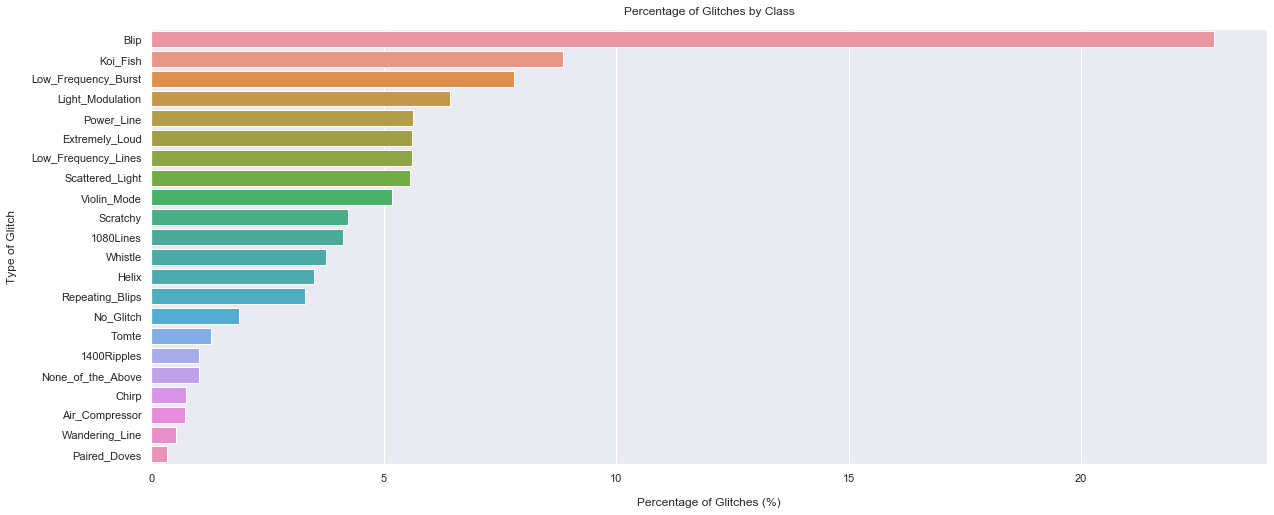

In [17]:
#setting plot size
sns.set(rc={'figure.figsize':(20,8)})

#let's look at how many glitch classes and how many of each kind there are
b1 = sns.barplot(x="percent", y="class", data=label_counts, orient = "h");
b1.set_ylabel("Type of Glitch", labelpad=14);
b1.set_xlabel("Percentage of Glitches (%)", labelpad=14)
b1.set_title("Percentage of Glitches by Class", y=1.02);

### Pairplot
<a id = 'pairplot'></a>

Let's go ahead and look at a pairplot of the data. There might be some interesting correlations in here.

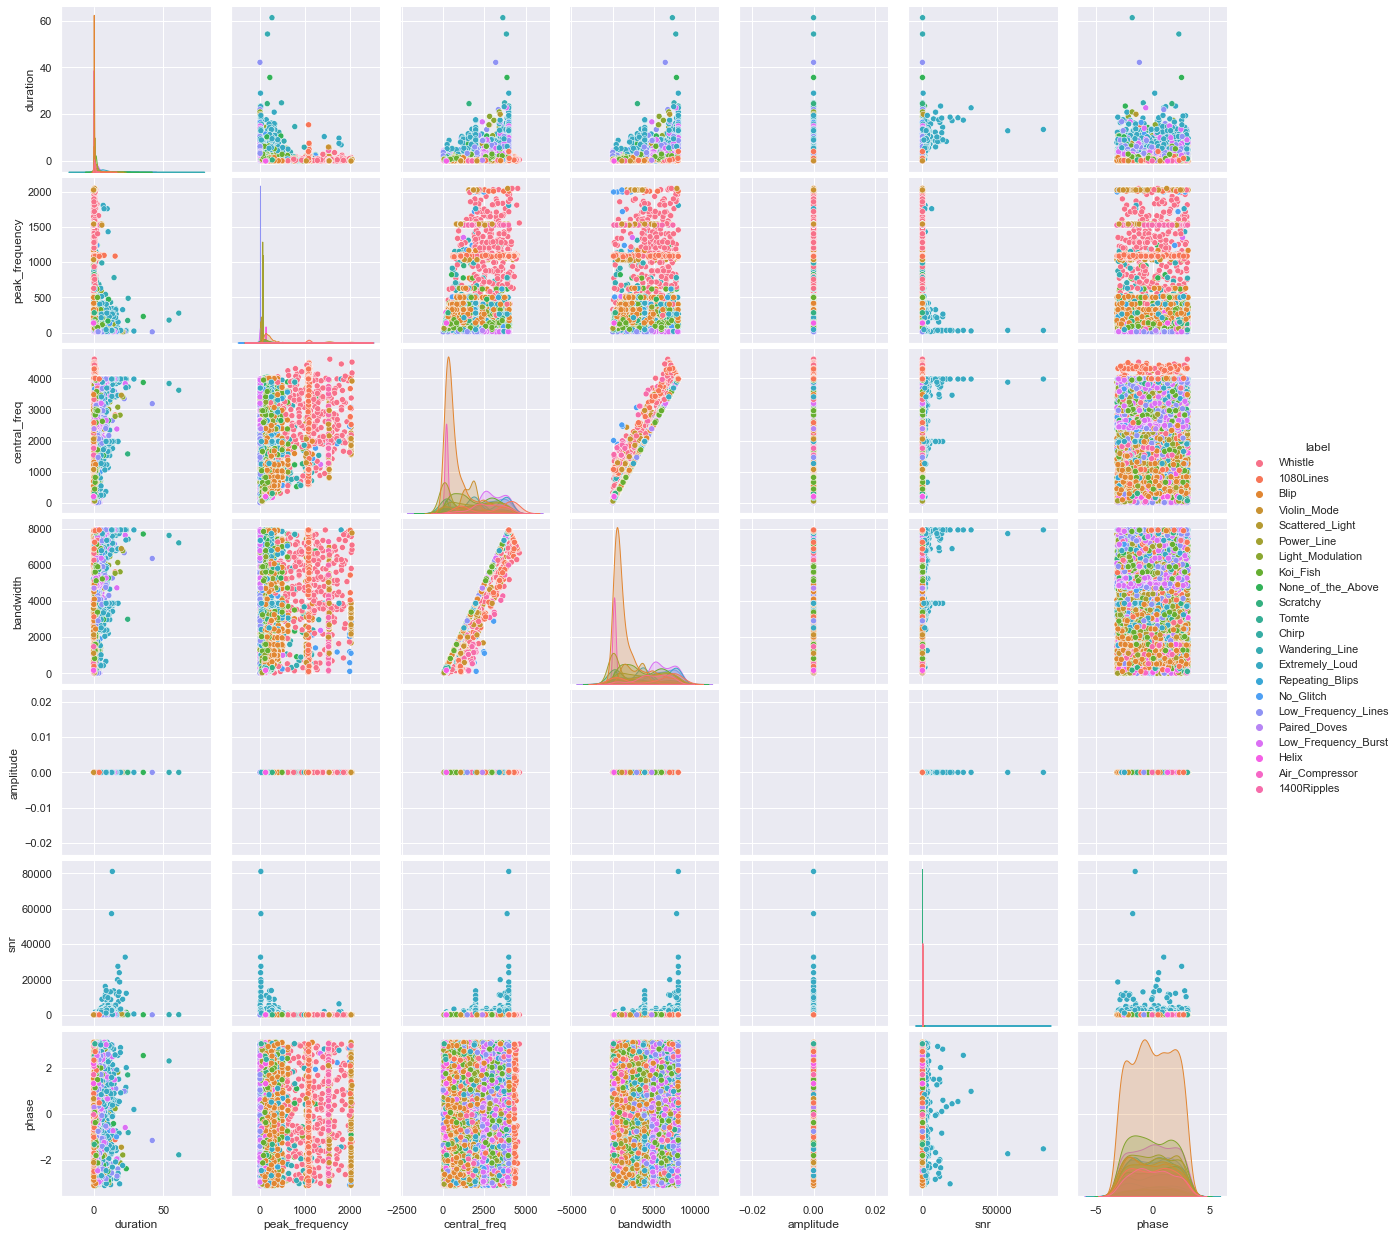

In [18]:
sns.pairplot(meta, hue="label");

In [23]:
print('The minimum amplitude value is '+str(min(meta['amplitude']))+'.')
print('The minimum amplitude value is '+str(max(meta['amplitude']))+'.')

The minimum amplitude value is 4.2510799103710293e-23.
The minimum amplitude value is 1.42988995019648e-16.


Now we might be mislead to believe from this that the amplitudes are all 0, but they're actually just very, very small, ranging from on the order of -23 to -16. These very small values just don't seem to be able to be represented well by the pairplot.

### Correlation
<a id = "corr"></a>

We have a sense of the correlation already from the pairplot, but let's go ahead and see the actually pearson correlation values as represented in a heat plot.

In [20]:
#integer encode the categorical columns
meta['label_int'] = meta.label.astype('category').cat.codes
meta['ifo_int'] = meta.ifo.astype('category').cat.codes

meta = meta[['duration', 'ifo','ifo_int', 'peak_frequency', 'central_freq', 'bandwidth',
       'amplitude', 'snr', 'phase', 'label','label_int', 'sample_type']]

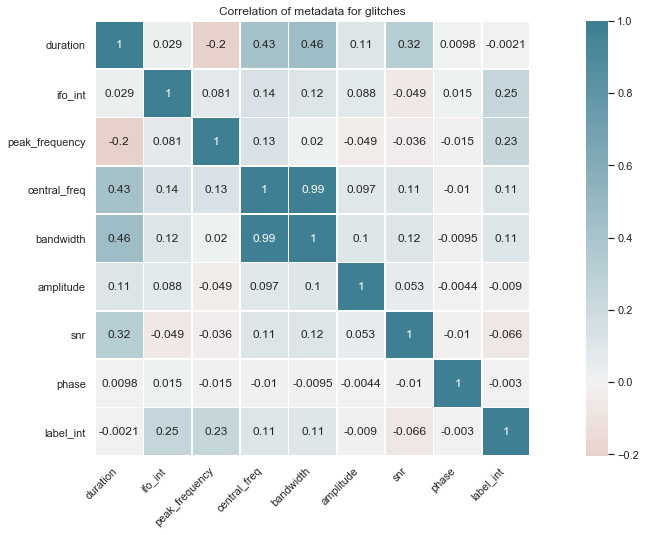

In [21]:
corr = meta.corr(method='pearson')

hm1 = sns.heatmap(corr,center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True, linewidths=.5)
hm1.set_xticklabels(hm1.get_xticklabels(),rotation=45,horizontalalignment='right');
#strange cut-oof of top and bottom rows that requires manually setting the y-axis
hm1.set_ylim(9, 0);
hm1.set_title("Correlation of metadata for glitches");

## Image preprocessing
<a id = "img_pre"></a>

In [11]:
samp_blip = img.imread(test_dir + 'Blip\\H1_0H27ffyt60_spectrogram_0.5.png')
samp_blip_shape = samp_blip.shape

#target size parameters
img_height = samp_blip_shape[0]
img_width = samp_blip_shape[1]
batch_size = 32 #default value
epochs = 50

In [12]:
#we need to generate tensor image data

#first rescale it to treat all images in the same manner
train_imgdatgen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_imgdatgen = ImageDataGenerator(rescale = 1./255)
val_imgdatgen = ImageDataGenerator(rescale = 1./255)

#need to take the path to the directories then generate batches of augmented data
train_gen = train_imgdatgen.flow_from_directory(directory=train_dir, batch_size=batch_size, target_size=(img_height, img_width), class_mode='categorical', color_mode="rgb")
test_gen = test_imgdatgen.flow_from_directory(directory=test_dir, batch_size=batch_size, target_size=(img_height, img_width), class_mode='categorical', color_mode="rgb")
val_gen = val_imgdatgen.flow_from_directory(directory=val_dir, batch_size=batch_size, target_size=(img_height, img_width), class_mode='categorical', color_mode="rgb")

#return the total images in the datasets
tot_train = train_gen.n
tot_test = test_gen.n
tot_val = val_gen.n

Found 22349 images belonging to 22 classes.
Found 4733 images belonging to 22 classes.
Found 4800 images belonging to 22 classes.


Label: Blip


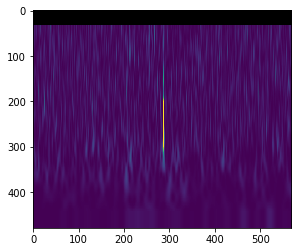

In [13]:
image, label = train_gen[10]

plt.imshow(image[0])
print('Label:', categories[int(np.where(label[0] == 1)[0])])

# Image classification
<a id = "img_class"></a>

## Multinomial logistical regression
<a id = "logit"></a>

# Works Referenced

1. <a id = "img_src"></a> Abbott, B. P., et al. “Observation of Gravitational Waves from a Binary Black Hole Merger.” *Physical Review Letters*, vol. 116, no. 6, 2016, doi:10.1103/physrevlett.116.061102. 
1. <a id = "intro_gw"></a> "Introduction to LIGO and Gravitational Waves." LIGO Scientific Collaboration. N.p., n.d. Web.
1. <a id = "hardware"></a> LIGO Scientific Collaboration & Virgo Collaboration. *Characterization of transient noise in Advanced LIGO relevant to gravitational wave signal GW150914*.
1. <a id = "sensitivity"></a> Macleod, Duncan M & the LIGO Scientific Collaboration & the Virgo Collaboration. *Characterization of the LIGO detectors during their sixth science run*. 21 Oct. 2014.
1. <a id = "gspy"></a> Zevin, M, et al. “Gravity Spy: Integrating Advanced LIGO Detector Characterization, Machine Learning, and Citizen Science.” *Classical and Quantum Gravity*, vol. 34, no. 6, 2017, p. 064003., doi:10.1088/1361-6382/aa5cea. 